# Parameterisation for submesoscale vertical buoyancy flux 

__author__ : Aurélie Albert & Julien Le Sommer (MEOM, IGE)

__contributing author__ : Adekunle Ajayi (MEOM, IGE)

__context__ : 22-GLO-HR project : Lot 1 - Ocean Modelling

__date__ : 7 March 2018

__purpose__ : Metric for the conversion rate of available potential energy to eddy kinetic energy in NATL60-CJM165 simulation

__detailed description__ : 
A parameterisation for this conversion rate proposed by Fox-Kemper et al., 2008 and scaled by Capet et al., 2008 is :

$$\mathcal PK = \langle w^{'}b^{'} \rangle_{xyz} \propto (\langle h \rangle_{xy} \cdot \langle \nabla_{h} \bar{b} \rangle_{xyz})^{2}$$


In the equation above, h, <>xy, <>xyz represents the mixed layer depth, horizontal averaging over region, and volume averaging over region respectively. Overbar signify large scale flow quantity.

__practical steps__ :

  * Input data are NATL60-CJM165 daily outputs of mixed layer depth (computed from T and S fields with cdfmxl cdftool : https://github.com/meom-group/CDFTOOLS) for one whole year (October 2012 to September 2013) and surface horizontal gradient of buoyancy (computed from T and S field with cdfhgradb cdftool) 
  * step 1. : Surface horizontal gradient of buoyancy daily outputs are spatially filtered to remove the fine scales with the Lanczos2DHighPassFilter.py script written in the framework of the Vorticity Variance metric (see https://gitlab.com/meom-group-private/cmems-22-glo-hr-codes/tree/master/Task1-fine-scale-metrics/Vorticity-variance) : computation done on occigen servers
  * step 2. : 10°x10° boxes already defined in the framework of the Kinetic energy wavenumber spectra are defined (see https://gitlab.com/meom-group-private/cmems-22-glo-hr-codes/blob/master/Task1-fine-scale-metrics/Wavenumber-spectrum/cmems-glo-hr_demo-fine-scale-metrics_02_kinetic-energy-wavenumber-spectra.ipynb)
  * step 3. : The squared product of average mixed layer depth and average large scale horizontal gradient of buoyancy is computed for each box and daily outputs
  * step 4. : Plots of the yearly time series are produced for each box
  
__external libraries needed to run this script__ : 

 * Definition of 10°x10° for NATL60 grid :natl60_10_by_10_boxes.py
 * Tools for plot in boxes : plot_box
 
__licence__ : This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

## 0. Importing external modules

In [1]:
## magics

%load_ext version_information 
%version_information numpy,xarray,netCDF4, matplotlib


Software versions
Python 2.7.11 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 4.2.0
OS Linux 3.16.0 4 amd64 x86_64 with debian 8.5
numpy 1.11.2
xarray 0.9.1
netCDF4 1.2.4
matplotlib 2.0.2
Wed Mar 07 16:20:12 2018 CET

In [2]:
## path for modules

import sys
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy.ma as ma

sys.path.insert(0,'/home/albert/lib/python/AJ-spectre/')
from natl60_10_by_10_boxes import boxes
import plot_box as pb

%matplotlib inline
%autosave 60

Autosaving every 60 seconds


## 1. Loading daily outputs of mixed layer depth and large scale horizontal gradient of buoyancy

In [3]:
database = '/media/extra/DATA/NATL60/NATL60-CJM165-S/'
mldfiles = sorted(glob.glob(database + 'MXL/NATL60-CJM165_y2*_somxl010.nc'))
gradbfiles = sorted(glob.glob(database + 'hgrad-large-scale/NATL60-CJM165_y2*_hgradb_large_scale.nc'))


In [6]:
time_counter=xr.open_mfdataset(mldfiles)['time_counter']

## 2. Defining the computation in boxes

In [4]:
def get_values_in_box(box,data):
    jmin,jmax = box.jmin,box.jmax
    imin,imax = box.imin,box.imax
    values = data[jmin:jmax+1,imin:imax+1]
    return values


In [5]:
def Estimate_wb(box,mld,gradb):
    mld_box = get_values_in_box(box,mld)
    gradb_box = get_values_in_box(box,gradb)    
    # - compute average
    avg_mld_box = mld_box.mean()
    avg_gradb_box = gradb_box.mean()
    # - compute w'b'
    wb_box = (avg_mld_box*avg_gradb_box)**2
    return wb_box

In [6]:
def get_wb_in_boxes(mldfiles,gradbfiles):
    global boxes
    _Ann_wb_arr = []
    for i in range(len(gradbfiles)): 
        if i%30 == 0: print mldfiles[i]
        mld = xr.open_dataset(mldfiles[i])['somxl010']
        gradb = xr.open_dataset(gradbfiles[i])['vohgradb']
        mld = mld.squeeze() ; gradb = gradb.squeeze();
        _wb_arr = []
        for box in boxes:
            wb = Estimate_wb(box,mld,gradb)
            _wb_arr.append(wb)
        wb_arr = np.array(_wb_arr)
        _Ann_wb_arr.append(wb_arr)
    Ann_wb_arr = np.array(_Ann_wb_arr)
    return Ann_wb_arr

## 3. Loop on the boxes and the input files

In [33]:
wb_boxes_yr = get_wb_in_boxes(mldfiles,gradbfiles)

/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2012m10d01.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2012m10d31.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2012m11d30.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2012m12d30.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2013m01d29.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2013m02d28.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2013m03d30.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2013m04d29.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2013m05d29.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2013m06d28.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2013m07d28.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJ

## 4. Time series plots in boxes

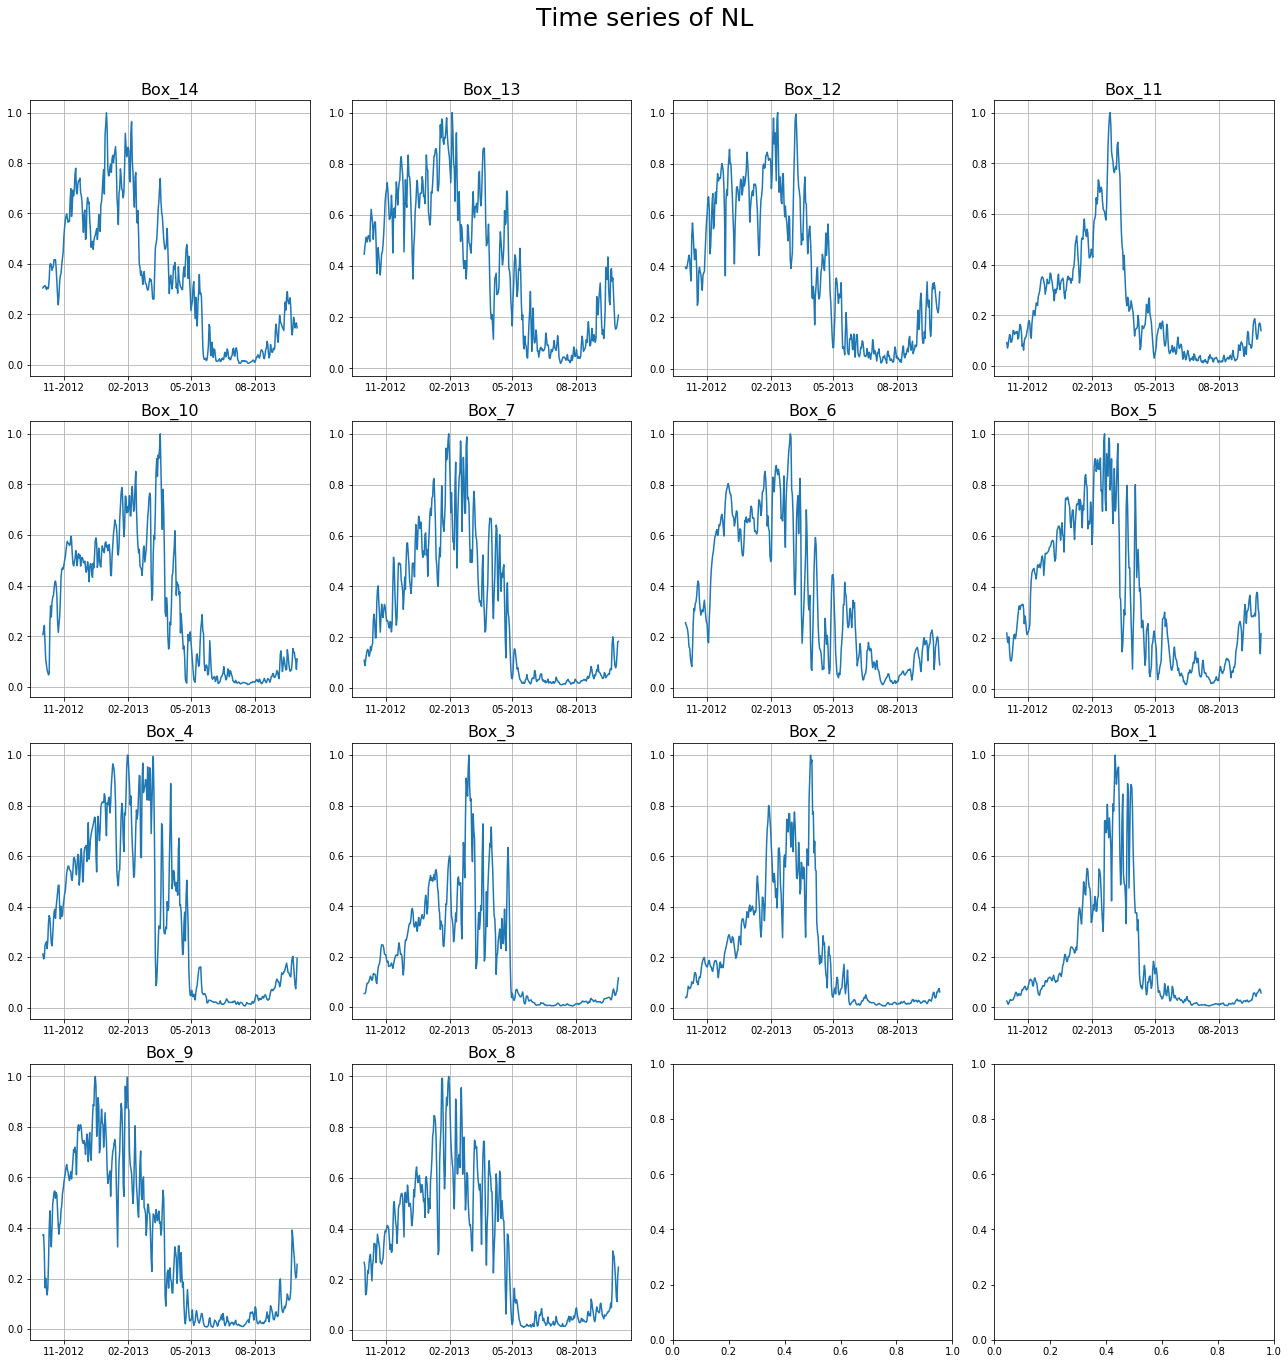

In [70]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Time series of NL'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    maxt=np.nanmax(wb_boxes_yr[:,k])
    axs[i].plot(time_counter,wb_boxes_yr[:,k]/maxt)
    axs[i].set_title(box.name,size=16)
    axs[i].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    axs[i].grid(True)
    #axs[i].set_xticklabels(labels)
    i = i + 1
    fig.tight_layout()

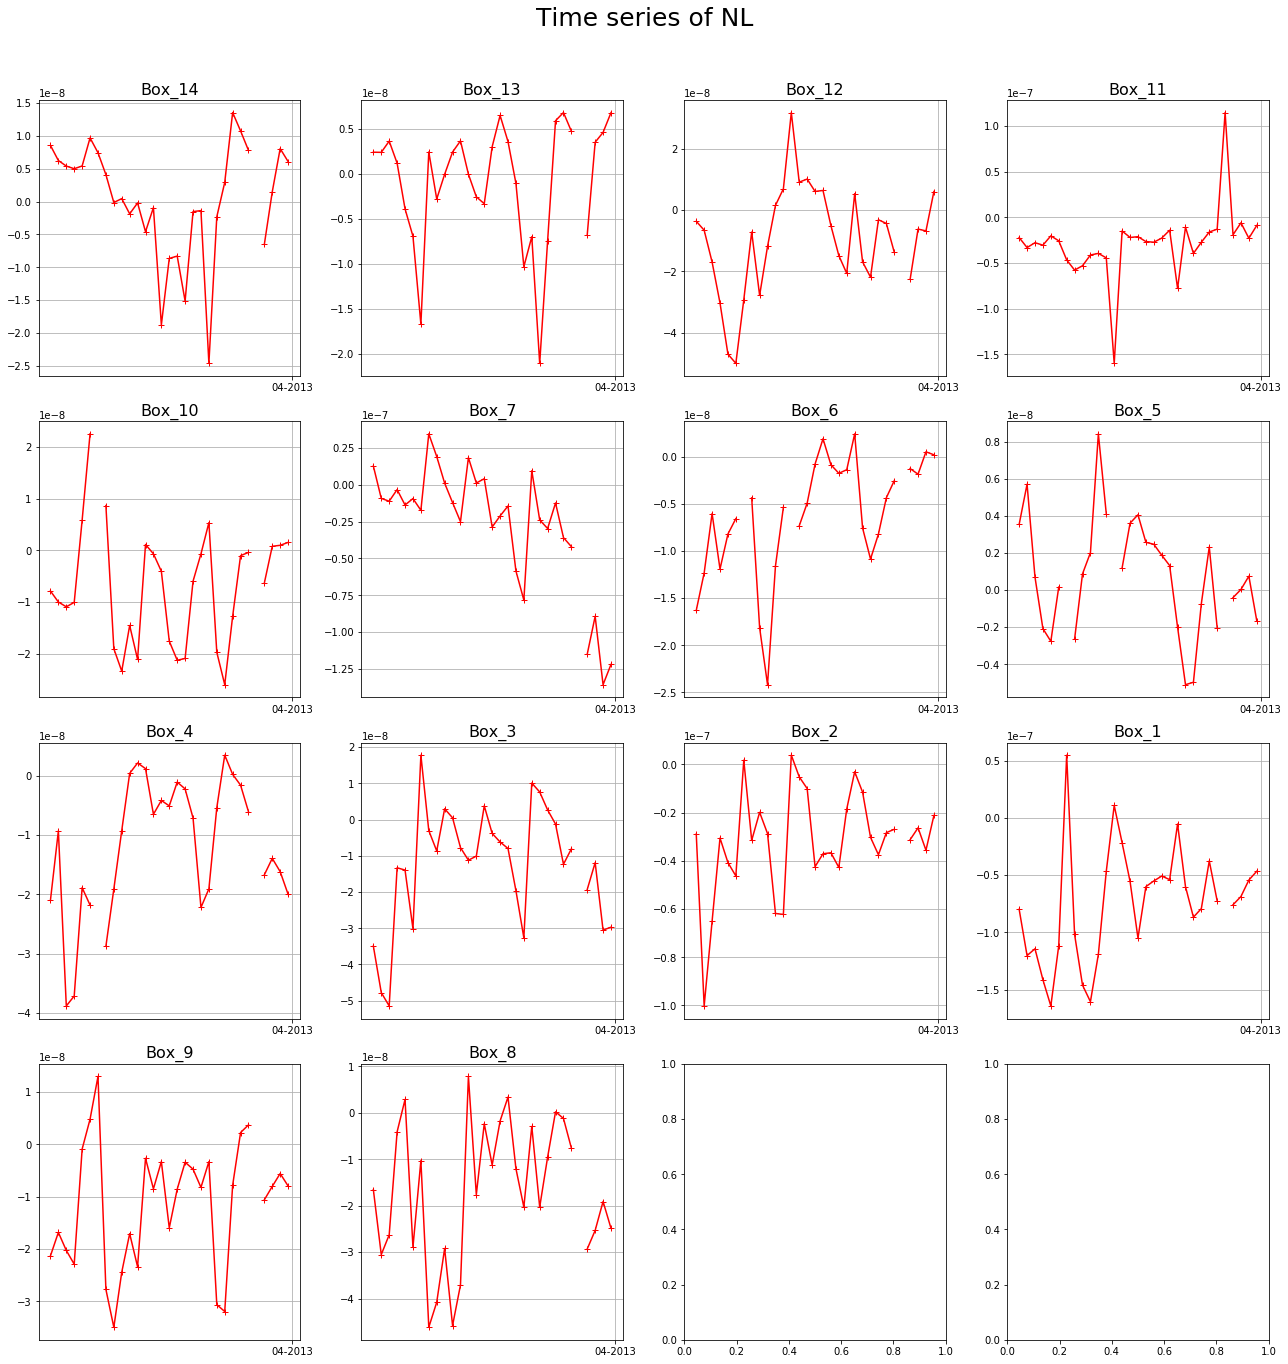

In [67]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Time series of NL'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    
    axs[i].plot(time_mxlwb,mxlwb_boxes_march[:,k],'r+-')
    axs[i].set_title(box.name,size=16)
    axs[i].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    axs[i].grid(True)
    #axs[i].set_xticklabels(labels)
    i = i + 1
    fig.tight_layout()

In [35]:
mxlwb_boxes_march[:,0]

array([  6.01125618e-07,   4.49943086e-07,   3.71374012e-07,
         3.85685181e-07,   4.08930247e-07,   6.32417426e-07,
         4.87778657e-07,   3.21701840e-07,   1.23995935e-07,
         2.32522908e-07,  -2.76122268e-08,  -4.09228979e-08,
        -3.45100078e-07,   7.75444738e-08,  -1.44358932e-06,
        -6.77264639e-07,  -7.29183303e-07,  -1.24741443e-06,
        -9.14825063e-09,   4.35894796e-08,  -1.90151642e-06,
        -2.03611501e-08,   1.61024305e-07,   7.54068635e-07,
         7.50315368e-07,   5.64765010e-07,              nan,
        -7.33518982e-07,   1.19355921e-07,   7.68390259e-07,
         6.82792622e-07])

In [36]:
wb_boxes_yr[:,0]

array([  1.50318776e-12,   1.52735404e-12,   1.52664939e-12,
         1.54949049e-12,   1.52102290e-12,   1.47604249e-12,
         1.51509296e-12,   1.48639483e-12,   1.51051134e-12,
         1.67171212e-12,   1.95670865e-12,   1.97730949e-12,
         1.94658229e-12,   1.84812454e-12,   1.89438121e-12,
         1.92763438e-12,   2.05515250e-12,   2.04650636e-12,
         2.05579081e-12,   1.88250177e-12,   1.62949234e-12,
         1.34987366e-12,   1.17272938e-12,   1.34612173e-12,
         1.63344383e-12,   1.75155381e-12,   1.78584294e-12,
         1.95798020e-12,   2.07436903e-12,   2.20338420e-12,
         2.49618944e-12,   2.67604090e-12,   2.81553443e-12,
         2.89776373e-12,   2.94617019e-12,   2.86279259e-12,
         2.78523562e-12,   2.80320833e-12,   2.80165063e-12,
         3.22178158e-12,   3.44054911e-12,   2.89725127e-12,
         3.09211966e-12,   3.41160085e-12,   3.30205860e-12,
         3.42929123e-12,   3.72953475e-12,   3.84012384e-12,
         3.38949712e-12,

In [41]:
i=0
print mxlwbfiles[i]
mxlwb = xr.open_dataset(mxlwbfiles[i])['somxlwb']
mxlwb = mxlwb.squeeze()
_mxlwb_arr = []
box=boxes[k]
mxlwb_box = get_values_in_box(box,mxlwb)

/media/extra/DATA/NATL60/NATL60-CJM165-S/mxlwb/NATL60-CJM165_y2013m03d01.1d_mxlwbfilt_filt-n80-f0.0125.nc


In [43]:
mxlwb_box.values

array([[  9.56857639e-06,   3.32817581e-06,  -4.86231875e-06, ...,
         -1.24393237e-05,              nan,              nan],
       [ -6.83225517e-06,   6.30928116e-06,   2.20738116e-06, ...,
                     nan,              nan,              nan],
       [ -5.27436969e-05,  -3.52133320e-05,  -1.76227441e-05, ...,
                     nan,              nan,              nan],
       ..., 
       [ -1.36104762e-04,  -1.57059912e-04,  -1.74723376e-04, ...,
          6.73644593e-07,  -1.01747162e-06,   2.27053624e-06],
       [ -1.76167770e-04,  -1.93096086e-04,  -1.61769349e-04, ...,
          2.96152280e-06,   1.50925598e-06,   3.57317731e-06],
       [ -4.22852245e-05,  -1.29068707e-04,  -1.95271510e-04, ...,
          4.01025636e-06,   3.71102965e-06,   4.93550260e-06]])

In [44]:
mxlwb_all = xr.open_mfdataset(mxlwbfiles)['somxlwb']

In [45]:
mxlwb_all.shape

(31, 3454, 5422)

In [46]:
truc=np.isnan(mxlwb_all)

In [47]:
truc.shape

(31, 3454, 5422)

In [55]:
print np.nanmin(mxlwb_all[0]),np.nanmax(mxlwb_all[0])

-0.0358098819852 0.0204958021641


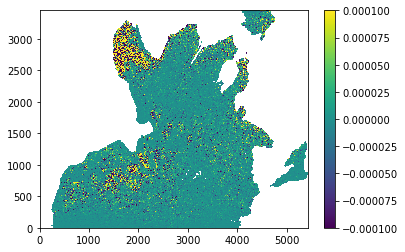

In [58]:
plt.pcolormesh(ma.masked_invalid(mxlwb_all[0]),vmin=-0.0001,vmax=0.0001)
plt.colorbar()